# Internship Assignment Work

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: ignore warnings
import warnings
warnings.filterwarnings('ignore')

# 2. Load & Clean Data

In [2]:
df = pd.read_excel(r"C:\Users\anany\Downloads\Jumbo & Company_ Attach % .xls")

In [3]:
# Check first 5 rows
df.head()

,Branch,Store_Name,Dec,Nov,Oct,Sep,Aug
0,Delhi_Ncr,Delhi(Janakpuri) Br,0.23,0.17,0.16,0.25,0.24
1,Delhi_Ncr,Haryana(Gurgaon) Br,0.21,0.26,0.15,0.28,0.04
2,Delhi_Ncr,Up(Greater Noida) Br,0.25,0.36,0.30,0.41,0.43
3,Pune,Pune(Bhosari) Br,0.33,0.33,0.36,0.13,0.32
4,Gujarat,Ahmedabad(Maninagar) Br,0.19,0.11,0.14,0.21,0.17


In [4]:
# Convert percentage columns to float if they are not already
months = ['Aug','Sep','Oct','Nov','Dec']
for m in months:
    df[m] = df[m].astype(float)  # Already 0-1 format

In [5]:
# Calculate average attach % per store
df['Avg_Attach'] = df[months].mean(axis=1)

# Check for missing values
print(df.isnull().sum())

Branch        0
Store_Name    0
Dec           0
Nov           0
Oct           0
Sep           0
Aug           0
Avg_Attach    0
dtype: int64


In [8]:
# View first 5 rows
df.tail()

,Branch,Store_Name,Dec,Nov,Oct,Sep,Aug,Avg_Attach
158,Gujarat,Vadodara(Manjalpur) Br,0.25,0.12,0.15,0.0,0.01,0.106
159,Thane,Kharghar Br,0.00,0.00,0.00,0.0,0.00,0.000
160,Telangana,Ap(Tirupathi-Leela Mahal Circle),0.00,0.00,0.00,0.0,0.00,0.000
161,Telangana,Ap(Rajamundry),0.00,0.00,0.00,0.0,0.00,0.000
162,Gujarat,Vadodara(Kothi Road),0.00,0.00,0.00,0.0,0.00,0.000


# 3. Quick Data Overview

In [11]:
# Summary statistics
print(df.describe())

              Dec         Nov         Oct         Sep         Aug  Avg_Attach
count  163.000000  163.000000  163.000000  163.000000  163.000000  163.000000
mean     0.217239    0.217117    0.170920    0.167301    0.128589    0.180233
std      0.173270    0.131246    0.116125    0.134518    0.116640    0.103524
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.095000    0.130000    0.100000    0.080000    0.035000    0.117000
50%      0.200000    0.200000    0.160000    0.150000    0.110000    0.164000
75%      0.300000    0.295000    0.240000    0.245000    0.190000    0.235000
max      1.000000    0.700000    0.710000    0.800000    0.600000    0.622000


In [12]:
# Unique branches and stores
print("Branches:", df['Branch'].unique())
print("Total stores:", df['Store_Name'].nunique())

Branches: ['Delhi_Ncr' 'Pune' 'Gujarat' 'Thane' 'Telangana' 'Mumbai']
Total stores: 163


# 4. Aggregation & Insights

In [13]:
# Average attach % per branch
branch_avg = df.groupby('Branch')[months].mean()
print(branch_avg)

                Aug       Sep       Oct       Nov       Dec
Branch                                                     
Delhi_Ncr  0.191364  0.227955  0.235227  0.280455  0.283409
Gujarat    0.092917  0.131250  0.129167  0.128333  0.191250
Mumbai     0.113684  0.185263  0.170526  0.215263  0.182632
Pune       0.205000  0.243125  0.291250  0.355000  0.288125
Telangana  0.069500  0.080000  0.086250  0.175250  0.180750
Thane      0.104500  0.174000  0.153000  0.159500  0.152000


In [14]:
# Top 10 stores by average attach %
top_stores = df[['Store_Name','Avg_Attach']].sort_values(by='Avg_Attach', ascending=False)
print(top_stores.head(10))

              Store_Name  Avg_Attach
10      Delhi(Hauz Khas)       0.622
69        Pune(Hadapsar)       0.586
64        Pune(Kondhawa)       0.414
81     Delhi(Budh Vihar)       0.390
17      Delhi(Daryaganj)       0.386
29     Pune(Dange Chowk)       0.368
7            Bhiwandi Br       0.362
91         Delhi(Narela)       0.358
21  Haryana(Mewla M.) Br       0.352
2   Up(Greater Noida) Br       0.350


# 5. Visualizations

### a) Average attach % per branch

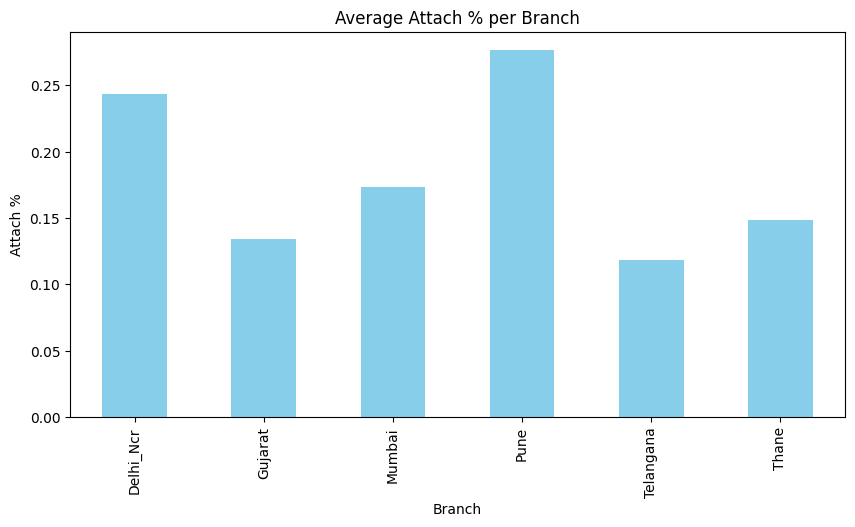

In [15]:
branch_avg.mean(axis=1).plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title('Average Attach % per Branch')
plt.ylabel('Attach %')
plt.show()

### b) Monthly trend across all stores

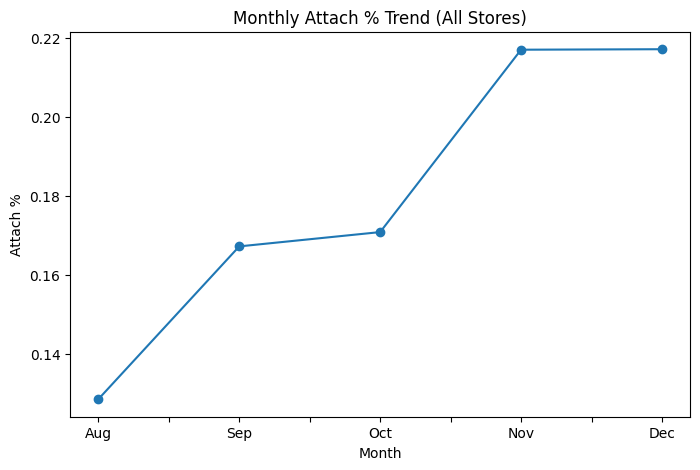

In [16]:
monthly_avg = df[months].mean()
monthly_avg.plot(kind='line', marker='o', figsize=(8,5))
plt.title('Monthly Attach % Trend (All Stores)')
plt.ylabel('Attach %')
plt.xlabel('Month')
plt.show()

### c) Top 10 stores by Avg Attach %

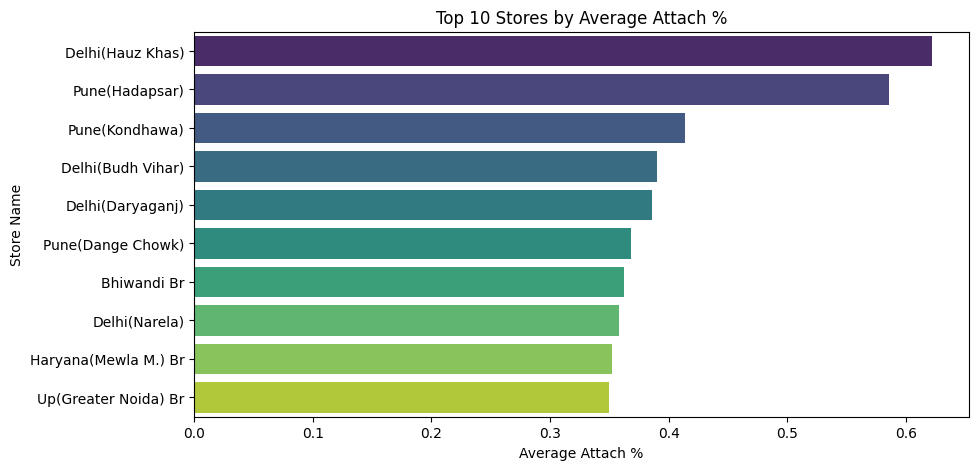

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(x='Avg_Attach', y='Store_Name', data=top_stores.head(10), palette='viridis')
plt.title('Top 10 Stores by Average Attach %')
plt.xlabel('Average Attach %')
plt.ylabel('Store Name')
plt.show()

### d) Heatmap of store vs month

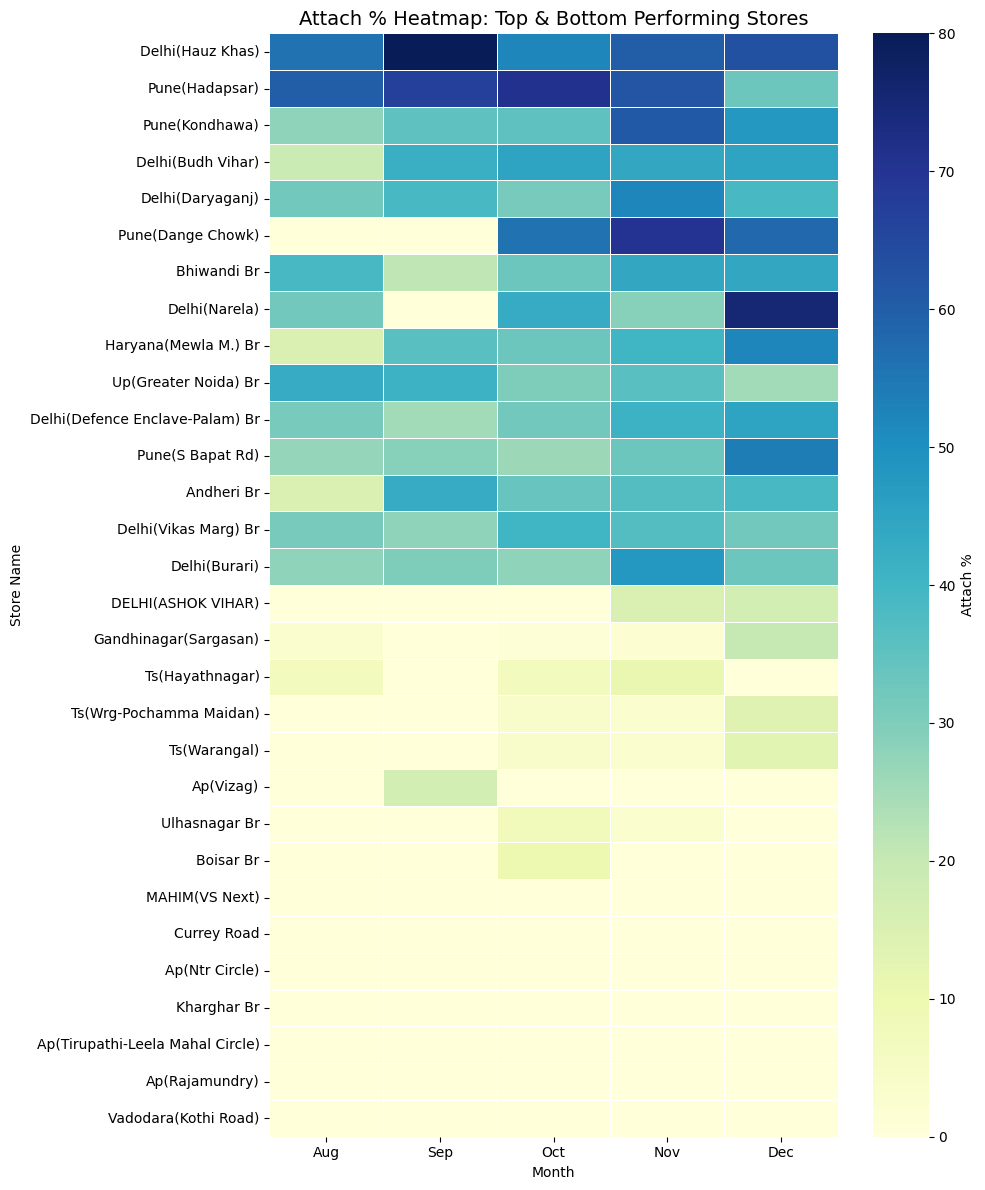

In [24]:
# -----------------------------
# Configuration
# -----------------------------
months = ['Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# -----------------------------
# Sort stores by performance
# -----------------------------
df_sorted = df.sort_values('Avg_Attach', ascending=False)

# Select top & bottom performers
top15 = df_sorted.head(15)
bottom15 = df_sorted.tail(15)

# Combine for clean heatmap
heatmap_df = pd.concat([top15, bottom15])

# Convert to percentage for display
heatmap_display = heatmap_df.copy()
heatmap_display[months] = heatmap_display[months] * 100

# -----------------------------
# Plot Heatmap
# -----------------------------
plt.figure(figsize=(10, 12))

sns.heatmap(
    heatmap_display.set_index('Store_Name')[months],
    cmap='YlGnBu',
    linewidths=0.5,
    annot=False,
    cbar_kws={'label': 'Attach %'}
)

plt.title('Attach % Heatmap: Top & Bottom Performing Stores', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Store Name')
plt.tight_layout()
plt.show()


# 6. Categorize Stores

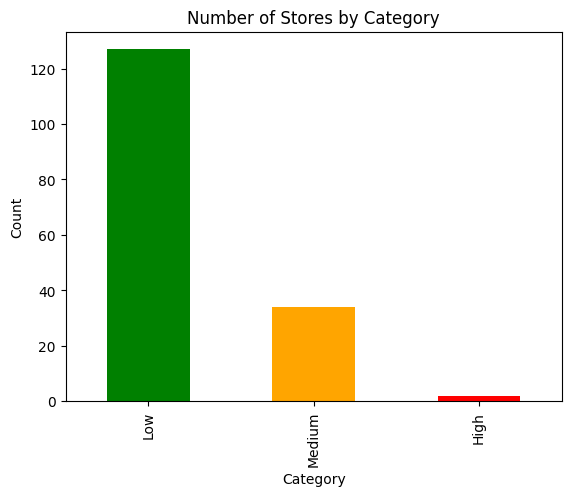

In [25]:
def categorize(x):
    if x >= 0.5:  # 50%+
        return 'High'
    elif x >= 0.25:  # 25%-50%
        return 'Medium'
    else:
        return 'Low'

df['Category'] = df['Avg_Attach'].apply(categorize)

# Count of stores in each category
df['Category'].value_counts().plot(kind='bar', color=['green','orange','red'])
plt.title('Number of Stores by Category')
plt.ylabel('Count')
plt.show()

# 7. Prediction for January
Here we use last 5 months’ average per store as prediction for January :-

In [21]:
# Simple prediction: mean of last 5 months
df['Jan_Predicted'] = df[months].mean(axis=1)
df[['Store_Name','Jan_Predicted']].head(10)


,Store_Name,Jan_Predicted
0,Delhi(Janakpuri) Br,0.210
1,Haryana(Gurgaon) Br,0.188
2,Up(Greater Noida) Br,0.350
3,Pune(Bhosari) Br,0.294
4,Ahmedabad(Maninagar) Br,0.164
5,Pune(Nagar Road) Br,0.260
6,Pune(Chinchwad) Br,0.266
7,Bhiwandi Br,0.362
8,Up (Noida Sec.18) Br,0.218
9,Pune(Baner) Br,0.236


### Use a linear trend if you want a slightly better forecast:

In [22]:
from sklearn.linear_model import LinearRegression

# Encode months as numbers
month_nums = np.array([1,2,3,4,5]).reshape(-1,1)  # Aug=1, Sep=2, ..., Dec=5

predictions = []
for index, row in df.iterrows():
    attach_values = row[months].values
    model = LinearRegression()
    model.fit(month_nums, attach_values)
    jan_pred = model.predict(np.array([[6]]))[0]  # January = next month
    predictions.append(jan_pred)

df['Jan_Predicted_LR'] = predictions
df[['Store_Name','Jan_Predicted_LR']].head(10)


,Store_Name,Jan_Predicted_LR
0,Delhi(Janakpuri) Br,0.180
1,Haryana(Gurgaon) Br,0.284
2,Up(Greater Noida) Br,0.227
3,Pune(Bhosari) Br,0.360
4,Ahmedabad(Maninagar) Br,0.146
5,Pune(Nagar Road) Br,0.482
6,Pune(Chinchwad) Br,0.326
7,Bhiwandi Br,0.461
8,Up (Noida Sec.18) Br,0.194
9,Pune(Baner) Br,0.296


# 8. Optional Insights Table

In [23]:
# Show top stores predicted for January
df[['Store_Name','Category','Avg_Attach','Jan_Predicted_LR']].sort_values(by='Jan_Predicted_LR', ascending=False).head(10)


,Store_Name,Category,Avg_Attach,Jan_Predicted_LR
29,Pune(Dange Chowk),Medium,0.368,0.926
116,Haryana(M G Road) Br,Medium,0.252,0.855
59,Ts(Bhel),Medium,0.290,0.710
91,Delhi(Narela),Medium,0.358,0.703
64,Pune(Kondhawa),Medium,0.414,0.612
74,Santacruz Br,Low,0.210,0.606
10,Delhi(Hauz Khas),High,0.622,0.604
12,Ts(Kondapur),Medium,0.284,0.602
21,Haryana(Mewla M.) Br,Medium,0.352,0.586
81,Delhi(Budh Vihar),Medium,0.390,0.552


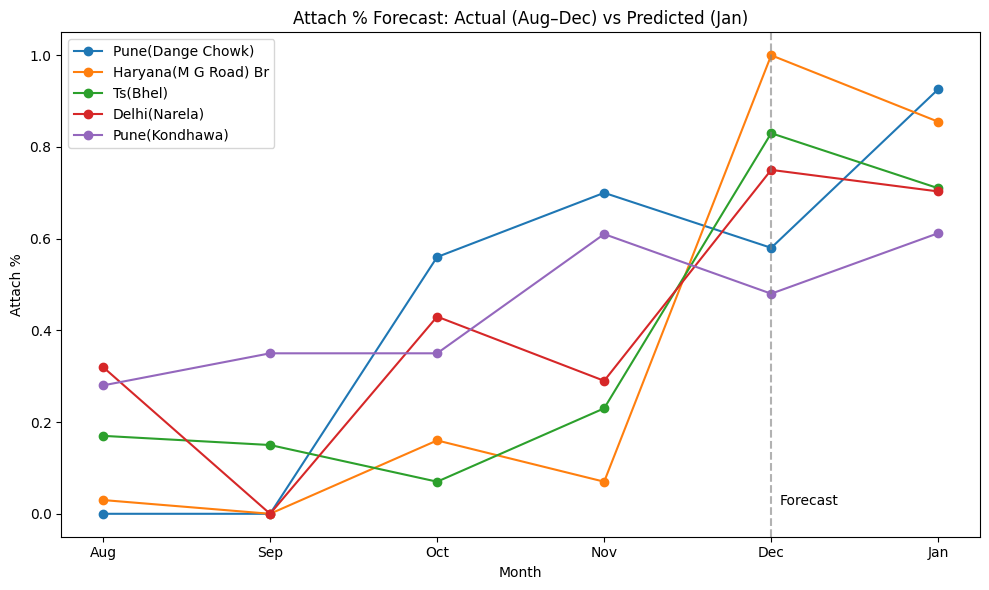

In [26]:
import matplotlib.pyplot as plt

# -----------------------------
# Fix prediction bounds
# -----------------------------
df['Jan_Predicted_LR'] = df['Jan_Predicted_LR'].clip(0, 1)

# -----------------------------
# Select top 5 stores by Jan prediction
# -----------------------------
top5 = df.sort_values('Jan_Predicted_LR', ascending=False).head(5)

months_actual = ['Aug', 'Sep', 'Oct', 'Nov', 'Dec']
months_all = ['Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan']

# -----------------------------
# Plot forecasting
# -----------------------------
plt.figure(figsize=(10,6))

for _, row in top5.iterrows():
    actual = row[months_actual].values.tolist()
    predicted = actual + [row['Jan_Predicted_LR']]
    
    plt.plot(months_all, predicted, marker='o', label=row['Store_Name'])

plt.axvline(x='Dec', linestyle='--', color='gray', alpha=0.6)
plt.text(4.05, 0.02, 'Forecast', fontsize=10)

plt.title('Attach % Forecast: Actual (Aug–Dec) vs Predicted (Jan)')
plt.ylabel('Attach %')
plt.xlabel('Month')
plt.legend()
plt.tight_layout()
plt.show()


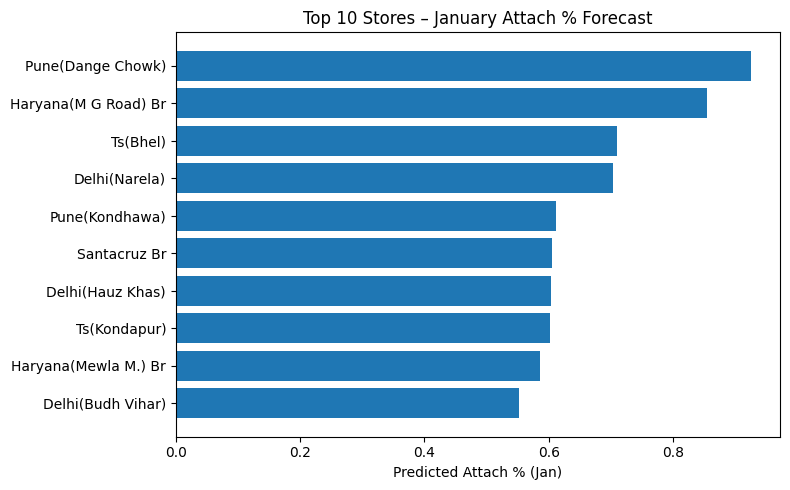

In [27]:
top10 = df.sort_values('Jan_Predicted_LR', ascending=False).head(10)

plt.figure(figsize=(8,5))
plt.barh(top10['Store_Name'], top10['Jan_Predicted_LR'])
plt.xlabel('Predicted Attach % (Jan)')
plt.title('Top 10 Stores – January Attach % Forecast')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
